# Does Higher <font color= 'olivedrab'>Median Income </font>Mean Higher <font color= 'goldenrod'>Test Scores</font>?
***
## Data Analysis based on IRS Median Household Income and Indiana Department of Education Data Reports
#### Brent Thomas, Matt Houser, Chelsea Snedden, Emmanuel Olofinkua
#### Sources of Data for Analysis:
#### &#8226; [IRS Individual Income Tax Statistics by Zip Code, 2017](https://www.irs.gov/statistics/soi-tax-stats-individual-income-tax-statistics-2017-zip-code-data-soi)
#### &#8226; [Indiana DOE School Corporation Data, 2017](https://www.doe.in.gov/accountability/find-school-and-corporation-data-reports)




In [151]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import json
from io import StringIO
import numpy as np
import matplotlib
import scipy.stats as st
import matplotlib.pyplot as plt
# File to Load 
school_data = "INSchoolDataCopy.csv"
test_score_data = "SchoolCorpDataRefined.csv"
income_data = "IncomeUpdateRefined.csv"
zip_city_codes = 'ZipCityCodes.csv'
zip_updated = 'zip_city_updated.csv'
sample_money = 'sampleMoney.csv'
# Read School and Student Data File and store into Pandas Data Frames
school_data = pd.read_csv(school_data)
test_score_data = pd.read_csv(test_score_data)
income_data = pd.read_csv(income_data)
zip_city_codes = pd.read_csv(zip_city_codes)
zip_updated = pd.read_csv(zip_updated)
sample_money = pd.read_csv(sample_money)
# Combine the data into a single dataset

In [152]:
def set_pandas_display_options() -> None:
    # Ref: https://stackoverflow.com/a/52432757/
    display = pd.options.display

    display.max_columns = 2000
    display.max_rows = 2000
    display.max_colwidth = 199
    display.width = None
    # display.precision = 2  # set as needed

set_pandas_display_options()

In [153]:
school_complete = pd.merge(school_data, test_score_data, how="left", on=["ID", "ID"])

In [154]:
school_complete.dropna()


ID                       District Name  \
1      15.0     ADAMS CENTRAL COMMUNITY SCHOOLS   
2    5265.0          ALEXANDRIA COM SCHOOL CORP   
3    5275.0      ANDERSON COMMUNITY SCHOOL CORP   
8    5470.0             ARGOS COMMUNITY SCHOOLS   
10   2435.0        ATTICA CONSOLIDATED SCH CORP   
11   3315.0          AVON COMMUNITY SCHOOL CORP   
12   1315.0          BARR-REEVE COM SCHOOLS INC   
13    365.0         BARTHOLOMEW CON SCHOOL CORP   
14   6895.0       BATESVILLE COMMUNITY SCH CORP   
15   2260.0             BAUGO COMMUNITY SCHOOLS   
17   5380.0            BEECH GROVE CITY SCHOOLS   
18    395.0        BENTON COMMUNITY SCHOOL CORP   
19    515.0            BLACKFORD COUNTY SCHOOLS   
20   2920.0          BLOOMFIELD SCHOOL DISTRICT   
22   3405.0           BLUE RIVER VALLEY SCHOOLS   
23   5480.0               BREMEN PUBLIC SCHOOLS   
24    670.0     BROWN COUNTY SCHOOL CORPORATION   
25   3305.0       BROWNSBURG COMMUNITY SCH CORP   
26   3695.0         BROWNSTOWN CNT COM SCH CORP   
28   3455.0      C A BEARD MEMORIAL SCHOOL CORP   
30   6340.0              CANNELTON CITY SCHOOLS   
32   3060.0                 CARMEL CLAY SCHOOLS   
34    750.0       CARROLL CONSOLIDATED SCH CORP   
35   2650.0           CASTON SCHOOL CORPORATION   
36   4205.0           CENTER GROVE COM SCH CORP   
37   8360.0       CENTERVILLE-ABINGTON COM SCHS   
40   6055.0       CENTRAL NOBLE COM SCHOOL CORP   
46   4145.0      CLARK-PLEASANT COM SCHOOL CORP   
47   1000.0         CLARKSVILLE COM SCHOOL CORP   
48   1125.0              CLAY COMMUNITY SCHOOLS   
49   1150.0         CLINTON CENTRAL SCHOOL CORP   
50   1160.0         CLINTON PRAIRIE SCHOOL CORP   
51   6750.0        CLOVERDALE COMMUNITY SCHOOLS   
53   1170.0      COMMUNITY SCHOOLS OF FRANKFORT   
56   2440.0        COVINGTON COMMUNITY SCH CORP   
57   1900.0         COWAN COMMUNITY SCHOOL CORP   
58   1300.0         CRAWFORD CO COM SCHOOL CORP   
59   5855.0          CRAWFORDSVILLE COM SCHOOLS   
60   3710.0     CROTHERSVILLE COMMUNITY SCHOOLS   
61   4660.0      CROWN POINT COMMUNITY SCH CORP   
65   5455.0       CULVER COMMUNITY SCHOOLS CORP   
66   1940.0         DALEVILLE COMMUNITY SCHOOLS   
68   3325.0      DANVILLE COMMUNITY SCHOOL CORP   
70   1655.0          DECATUR COUNTY COM SCHOOLS   
72   1805.0      DEKALB CO EASTERN COM SCH DIST   
73   1875.0      DELAWARE COMMUNITY SCHOOL CORP   
74    755.0        DELPHI COMMUNITY SCHOOL CORP   
77   6470.0         DUNELAND SCHOOL CORPORATION   
82   2725.0      EAST GIBSON SCHOOL CORPORATION   
84   6510.0      EAST PORTER COUNTY SCHOOL CORP   
85   8215.0         EAST WASHINGTON SCHOOL CORP   
87   2940.0              EASTERN GREENE SCHOOLS   
88   3145.0     EASTERN HANCOCK CO COM SCH CORP   
89   3480.0          EASTERN HOWARD SCHOOL CORP   
90   6620.0        EASTERN PULASKI COM SCH CORP   
91   4215.0        EDINBURGH COMMUNITY SCH CORP   
94   2305.0           ELKHART COMMUNITY SCHOOLS   
95   5280.0        ELWOOD COMMUNITY SCHOOL CORP   
96   5910.0      EMINENCE COMMUNITY SCHOOL CORP   
98   7995.0     EVANSVILLE VANDERBURGH SCH CORP   
100  2155.0         FAIRFIELD COMMUNITY SCHOOLS   
102  2395.0          FAYETTE COUNTY SCHOOL CORP   
104   370.0      FLAT ROCK-HAWCREEK SCHOOL CORP   
105   235.0        FORT WAYNE COMMUNITY SCHOOLS   
107  4225.0      FRANKLIN COMMUNITY SCHOOL CORP   
108  2475.0        FRANKLIN COUNTY COM SCH CORP   
109  5310.0      FRANKLIN TOWNSHIP COM SCH CORP   
110  5245.0       FRANKTON-LAPEL COMMUNITY SCHS   
111  7605.0           FREMONT COMMUNITY SCHOOLS   
112  8525.0         FRONTIER SCHOOL CORPORATION   
113  1820.0           GARRETT-KEYSER-BUTLER COM   
118  2315.0            GOSHEN COMMUNITY SCHOOLS   
119  1010.0        GREATER CLARK COUNTY SCHOOLS   
120  2120.0             GREATER JASPER CON SCHS   
122  6755.0      GREENCASTLE COMMUNITY SCH CORP   
124  3125.0      GREENFIELD-CENTRAL COM SCHOOLS   
125  1730.0        GREENSBURG COMMUNITY SCHOOLS   
126  4245.0        GREENWOOD CO

In [155]:
def set_pandas_display_options() -> None:
    # Ref: https://stackoverflow.com/a/52432757/
    display = pd.options.display

    display.max_columns = 2000
    display.max_rows = 2000
    display.max_colwidth = 199
    display.width = None
    # display.precision = 2  # set as needed

set_pandas_display_options()

In [156]:
school_district_complete = pd.merge(income_data, school_complete, how="left", on=["ZIP", "ZIP"])

In [157]:
school_district_complete.dropna()

ZIP Adjust Gross Income Number of returns     Amount      ID  \
0     46001.0             232,301             4,910    234,290  5265.0   
1     46001.0               23258              1910      23467  5265.0   
2     46001.0               46583              1280      47002  5265.0   
3     46001.0               46723               760      47017  5265.0   
4     46001.0               39929               460      40344  5265.0   
5     46001.0               57726               460      58378  5265.0   
6     46001.0               18082                40      18082  5265.0   
8     46011.0             453,901             8,270    458,637  5275.0   
10    46011.0             453,901             8,270    458,637  5245.0   
11    46011.0               36836              2960      37264  5275.0   
13    46011.0               36836              2960      37264  5245.0   
14    46011.0               75263              2070      75907  5275.0   
16    46011.0               75263              2070      75907  5245.0   
17    46011.0               74992              1220      75638  5275.0   
19    46011.0               74992              1220      75638  5245.0   
20    46011.0               70925               820      71514  5275.0   
22    46011.0               70925               820      71514  5245.0   
23    46011.0              133154              1020     134421  5275.0   
25    46011.0              133154              1020     134421  5245.0   
26    46011.0               62731               180      63893  5275.0   
28    46011.0               62731               180      63893  5245.0   
62    46030.0              90,336             1,430     92,007  3025.0   
63    46030.0                5282               470       5332  3025.0   
64    46030.0               12163               330      12315  3025.0   
65    46030.0               14120               230      14349  3025.0   
66    46030.0               12443               140      12669  3025.0   
67    46030.0               27341               200      27877  3025.0   
68    46030.0               18987                60      19465  3025.0   
86    46033.0           2,717,361            17,880  2,763,649  3060.0   
87    46033.0               38708              4360      39687  3060.0   
88    46033.0               69822              1900      71548  3060.0   
89    46033.0              101508              1630     103703  3060.0   
90    46033.0              139418              1590     142274  3060.0   
91    46033.0              688681              4840     698586  3060.0   
92    46033.0             1679224              3560    1707851  3060.0   
110   46036.0             220,648             5,160    222,345  5280.0   
111   46036.0               26438              2130      26646  5280.0   
112   46036.0               52635              1440      52882  5280.0   
113   46036.0               46626               760      46934  5280.0   
114   46036.0               35891               420      36146  5280.0   
115   46036.0               48597               380      49276  5280.0   
116   46036.0               10461                30      10461  5280.0   
142   46040.0             676,580             6,210    686,181  3135.0   
143   46040.0               17895              1710      18211  3135.0   
144   46040.0               39520              1070      40073  3135.0   
145   46040.0               44837               730      45432  3135.0   
146   46040.0               44998               520      45506  3135.0   
147   46040.0              180454              1270     182414  3135.0   
148   46040.0              348876               910     354545  3135.0   
150   46041.0             496,153            10,830    501,484  1160.0   
151   46041.0             496,153            10,830    501,484  1170.0   
152   46041.0               51000              4170      51515  1160.0   
153   46041.0               51000              4170      51515  1170.0   
154   46041.0 

In [158]:
zip_data_complete = pd.merge(income_data, zip_city_codes, how="left", on=["ZIP", "ZIP"])

In [159]:
zip_data_complete['Adjust Gross Income'] = pd.to_numeric(zip_data_complete['Adjust Gross Income'], errors='coerce')

In [160]:
zip_data_complete['Number of returns'] = pd.to_numeric(zip_data_complete['Number of returns'], errors='coerce')

In [161]:
zip_data_complete.dtypes

ZIP                    float64
Adjust Gross Income    float64
Number of returns      float64
Amount                  object
City                    object
County                  object
Unnamed: 3             float64
dtype: object

In [162]:
school_district_complete.dropna()

ZIP Adjust Gross Income Number of returns     Amount      ID  \
0     46001.0             232,301             4,910    234,290  5265.0   
1     46001.0               23258              1910      23467  5265.0   
2     46001.0               46583              1280      47002  5265.0   
3     46001.0               46723               760      47017  5265.0   
4     46001.0               39929               460      40344  5265.0   
5     46001.0               57726               460      58378  5265.0   
6     46001.0               18082                40      18082  5265.0   
8     46011.0             453,901             8,270    458,637  5275.0   
10    46011.0             453,901             8,270    458,637  5245.0   
11    46011.0               36836              2960      37264  5275.0   
13    46011.0               36836              2960      37264  5245.0   
14    46011.0               75263              2070      75907  5275.0   
16    46011.0               75263              2070      75907  5245.0   
17    46011.0               74992              1220      75638  5275.0   
19    46011.0               74992              1220      75638  5245.0   
20    46011.0               70925               820      71514  5275.0   
22    46011.0               70925               820      71514  5245.0   
23    46011.0              133154              1020     134421  5275.0   
25    46011.0              133154              1020     134421  5245.0   
26    46011.0               62731               180      63893  5275.0   
28    46011.0               62731               180      63893  5245.0   
62    46030.0              90,336             1,430     92,007  3025.0   
63    46030.0                5282               470       5332  3025.0   
64    46030.0               12163               330      12315  3025.0   
65    46030.0               14120               230      14349  3025.0   
66    46030.0               12443               140      12669  3025.0   
67    46030.0               27341               200      27877  3025.0   
68    46030.0               18987                60      19465  3025.0   
86    46033.0           2,717,361            17,880  2,763,649  3060.0   
87    46033.0               38708              4360      39687  3060.0   
88    46033.0               69822              1900      71548  3060.0   
89    46033.0              101508              1630     103703  3060.0   
90    46033.0              139418              1590     142274  3060.0   
91    46033.0              688681              4840     698586  3060.0   
92    46033.0             1679224              3560    1707851  3060.0   
110   46036.0             220,648             5,160    222,345  5280.0   
111   46036.0               26438              2130      26646  5280.0   
112   46036.0               52635              1440      52882  5280.0   
113   46036.0               46626               760      46934  5280.0   
114   46036.0               35891               420      36146  5280.0   
115   46036.0               48597               380      49276  5280.0   
116   46036.0               10461                30      10461  5280.0   
142   46040.0             676,580             6,210    686,181  3135.0   
143   46040.0               17895              1710      18211  3135.0   
144   46040.0               39520              1070      40073  3135.0   
145   46040.0               44837               730      45432  3135.0   
146   46040.0               44998               520      45506  3135.0   
147   46040.0              180454              1270     182414  3135.0   
148   46040.0              348876               910     354545  3135.0   
150   46041.0             496,153            10,830    501,484  1160.0   
151   46041.0             496,153            10,830    501,484  1170.0   
152   46041.0               51000              4170      51515  1160.0   
153   46041.0               51000              4170      51515  1170.0   
154   46041.0 

In [163]:
zip_updated.dtypes

ZIP                    float64
City                    object
County                  object
Adjust Gross Income     object
Number of returns       object
dtype: object

In [164]:
zip_updated['Adjust Gross Income'] = pd.to_numeric(zip_updated['Adjust Gross Income'], errors='coerce')

In [165]:
zip_updated['Number of returns'] = pd.to_numeric(zip_updated['Number of returns'], errors='coerce')

In [166]:
zip_updated.dtypes

ZIP                    float64
City                    object
County                  object
Adjust Gross Income    float64
Number of returns      float64
dtype: object

In [167]:
zip_updated = pd.pivot_table(zip_updated, values=['Number of returns', 'Adjust Gross Income'],  index=['City', 'County','ZIP'],
                      aggfunc={'Number of returns': np.sum, 'Adjust Gross Income': np.median})
                                
                               
zip_updated                             

Adjust Gross Income  \
City                    County      ZIP                            
Advance                 Boone       46102.0              12163.0   
Akron                   Fulton      46910.0              32067.0   
Alamo                   Montgomery  47916.0                  NaN   
Albany                  Delaware    47320.0             225020.0   
Albion                  Noble       46701.0              92346.0   
Alexandria              Madison     46001.0             232301.0   
Ambia                   Benton      47917.0             496460.0   
Amboy                   Miami       46911.0                  NaN   
Amo                     Hendricks   46103.0              14120.0   
Anderson                Madison     46011.0              23258.0   
                                    46012.0              46583.0   
                                    46013.0              46723.0   
                                    46014.0              39929.0   
                                    46015.0              57726.0   
                                    46016.0              18082.0   
                                    46017.0                  NaN   
                                    46018.0             453901.0   
Andrews                 Huntington  46702.0              51337.0   
Angola                  Steuben     46703.0                  NaN   
Arcadia                 Hamilton    46030.0              36836.0   
Arcola                  Allen       46704.0              41944.0   
Argos                   Marshall    46501.0                  NaN   
Arlington               Rush        46104.0              12443.0   
Ashley                  De Kalb     46705.0               3018.0   
Athens                  Fulton      46912.0             527683.0   
Atlanta                 Hamilton    46031.0              75263.0   
Attica                  Fountain    47918.0              91233.0   
Atwood                  Kosciusko   46502.0             485146.0   
Auburn                  De Kalb     46706.0               6677.0   
Aurora                  Dearborn    47001.0               1703.0   
Austin                  Scott       47102.0            2089681.0   
Avilla                  Noble       46710.0               7894.0   
Avoca                   Lawrence    47420.0              58409.0   
Avon                    Hendricks   46123.0             135913.0   
Bainbridge              Putnam      46105.0              27341.0   
Bargersville            Johnson     46106.0              18987.0   
Batesville              Ripley      47006.0               3641.0   
Bath                    Franklin    47010.0               3228.0   
Battle Ground           Tippecanoe  47920.0             163509.0   
Bedford                 Lawrence    47421.0              20507.0   
Beech Grove             Marion      46107.0                  NaN   
Bellmore                Parke       47830.0                  NaN   
Bennington              Switzerland 47011.0               5023.0   
Bentonville             Fayette     47322.0             151026.0   
Berne                   Adams       46711.0               6416.0   
Bethlehem               Clark       47104.0              99163.0   
Beverly Shores          Porter      46301.0                  NaN   
Bicknell                Knox        47512.0             325210.0   
Bippus                  Huntington  46713.0              17939.0   
Birdseye                Dubois      47513.0              23096.0   
Blanford                Vermillion  47831.0              99519.0   
Bloomfield              Greene      47424.0                  NaN   
Bloomingdale            Parke       47832.0              18731.0   
Bloomington             Monroe      47401.0              18994.0   
                                    47402.0                  NaN   
                                    47403.0                  NaN   
                                    47404.0             232603.0   
                                 

In [168]:
school_district = school_district_complete.dropna()

In [169]:
school_district.dtypes

ZIP                    float64
Adjust Gross Income     object
Number of returns       object
Amount                  object
ID                     float64
District Name           object
Mailing Address         object
City                    object
State                   object
Overall Points         float64
Overall Grade           object
dtype: object

In [170]:

school_district['Amount'] = pd.to_numeric(school_district['Amount'], errors='coerce')


/Users/matthouser/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [171]:
school_district['Amount'].dtype

dtype('float64')

In [172]:
school_district['Adjust Gross Income'] = pd.to_numeric(school_district['Adjust Gross Income'], errors='coerce')

/Users/matthouser/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [173]:
school_district['Adjust Gross Income'].dtype

dtype('float64')

In [174]:
school_district['Number of returns'] = pd.to_numeric(school_district['Number of returns'], errors='coerce')

/Users/matthouser/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [175]:
school_district.dtypes

ZIP                    float64
Adjust Gross Income    float64
Number of returns      float64
Amount                 float64
ID                     float64
District Name           object
Mailing Address         object
City                    object
State                   object
Overall Points         float64
Overall Grade           object
dtype: object

In [176]:
def set_pandas_display_options() -> None:
    # Ref: https://stackoverflow.com/a/52432757/
    display = pd.options.display

    display.max_columns = 2000
    display.max_rows = 2000
    display.max_colwidth = 199
    display.width = None
    # display.precision = 2  # set as needed

set_pandas_display_options()

In [177]:
school_district

ZIP  Adjust Gross Income  Number of returns     Amount      ID  \
0     46001.0                  NaN                NaN        NaN  5265.0   
1     46001.0              23258.0             1910.0    23467.0  5265.0   
2     46001.0              46583.0             1280.0    47002.0  5265.0   
3     46001.0              46723.0              760.0    47017.0  5265.0   
4     46001.0              39929.0              460.0    40344.0  5265.0   
5     46001.0              57726.0              460.0    58378.0  5265.0   
6     46001.0              18082.0               40.0    18082.0  5265.0   
8     46011.0                  NaN                NaN        NaN  5275.0   
10    46011.0                  NaN                NaN        NaN  5245.0   
11    46011.0              36836.0             2960.0    37264.0  5275.0   
13    46011.0              36836.0             2960.0    37264.0  5245.0   
14    46011.0              75263.0             2070.0    75907.0  5275.0   
16    46011.0              75263.0             2070.0    75907.0  5245.0   
17    46011.0              74992.0             1220.0    75638.0  5275.0   
19    46011.0              74992.0             1220.0    75638.0  5245.0   
20    46011.0              70925.0              820.0    71514.0  5275.0   
22    46011.0              70925.0              820.0    71514.0  5245.0   
23    46011.0             133154.0             1020.0   134421.0  5275.0   
25    46011.0             133154.0             1020.0   134421.0  5245.0   
26    46011.0              62731.0              180.0    63893.0  5275.0   
28    46011.0              62731.0              180.0    63893.0  5245.0   
62    46030.0                  NaN                NaN        NaN  3025.0   
63    46030.0               5282.0              470.0     5332.0  3025.0   
64    46030.0              12163.0              330.0    12315.0  3025.0   
65    46030.0              14120.0              230.0    14349.0  3025.0   
66    46030.0              12443.0              140.0    12669.0  3025.0   
67    46030.0              27341.0              200.0    27877.0  3025.0   
68    46030.0              18987.0               60.0    19465.0  3025.0   
86    46033.0                  NaN                NaN        NaN  3060.0   
87    46033.0              38708.0             4360.0    39687.0  3060.0   
88    46033.0              69822.0             1900.0    71548.0  3060.0   
89    46033.0             101508.0             1630.0   103703.0  3060.0   
90    46033.0             139418.0             1590.0   142274.0  3060.0   
91    46033.0             688681.0             4840.0   698586.0  3060.0   
92    46033.0            1679224.0             3560.0  1707851.0  3060.0   
110   46036.0                  NaN                NaN        NaN  5280.0   
111   46036.0              26438.0             2130.0    26646.0  5280.0   
112   46036.0              52635.0             1440.0    52882.0  5280.0   
113   46036.0              46626.0              760.0    46934.0  5280.0   
114   46036.0              35891.0              420.0    36146.0  5280.0   
115   46036.0              48597.0              380.0    49276.0  5280.0   
116   46036.0              10461.0               30.0    10461.0  5280.0   
142   46040.0                  NaN                NaN        NaN  3135.0   
143   46040.0              17895.0             1710.0    18211.0  3135.0   
144   46040.0              39520.0             1070.0    40073.0  3135.0   
145   46040.0              44837.0              730.0    45432.0  3135.0   
146   46040.0              44998.0              520.0    45506.0  3135.0   
147   46040.0             180454.0             1270.0   182414.0  3135.0   
148   46040.0             348876.0              910.0   354545.0  3135.0   
150   46041.0                  NaN                NaN        NaN  1160.0   
151   46041.0                  NaN                NaN        NaN  1170.0   
152   46041.0              51000.0             4170.0    5

In [178]:
school_district.groupby('District Name').sum()[['Adjust Gross Income']]

Adjust Gross Income
District Name                                          
ADAMS CENTRAL COMMUNITY SCHOOLS                 58782.0
ALEXANDRIA COM SCHOOL CORP                     232301.0
ANDERSON COMMUNITY SCHOOL CORP                 453901.0
ARGOS COMMUNITY SCHOOLS                         75693.0
ATTICA CONSOLIDATED SCH CORP                   137011.0
AVON COMMUNITY SCHOOL CORP                    1403915.0
BARR-REEVE COM SCHOOLS INC                     107364.0
BARTHOLOMEW CON SCHOOL CORP                   1459450.0
BATESVILLE COMMUNITY SCH CORP                  427520.0
BAUGO COMMUNITY SCHOOLS                        544500.0
BEECH GROVE CITY SCHOOLS                       268949.0
BENTON COMMUNITY SCHOOL CORP                    84447.0
BLACKFORD COUNTY SCHOOLS                       193312.0
BLOOMFIELD SCHOOL DISTRICT                     221249.0
BREMEN PUBLIC SCHOOLS                          284972.0
BROWN COUNTY SCHOOL CORPORATION                229895.0
BROWNSBURG COMMUNITY SCH CORP                 1434517.0
BROWNSTOWN CNT COM SCH CORP                    141231.0
C A BEARD MEMORIAL SCHOOL CORP                 124057.0
CANNELTON CITY SCHOOLS                          62208.0
CARMEL CLAY SCHOOLS                           2717361.0
CARROLL CONSOLIDATED SCH CORP                   78726.0
CENTER GROVE COM SCH CORP                     2089681.0
CENTERVILLE-ABINGTON COM SCHS                  134163.0
CENTRAL NOBLE COM SCHOOL CORP                  193680.0
CLARK-PLEASANT COM SCHOOL CORP                 325210.0
CLARKSVILLE COM SCHOOL CORP                    366334.0
CLAY COMMUNITY SCHOOLS                         419512.0
CLINTON CENTRAL SCHOOL CORP                     26571.0
CLINTON PRAIRIE SCHOOL CORP                    496153.0
CLOVERDALE COMMUNITY SCHOOLS                   140512.0
COMMUNITY SCHOOLS OF FRANKFORT                 496153.0
COVINGTON COMMUNITY SCH CORP                   134164.0
COWAN COMMUNITY SCHOOL CORP                    388849.0
CRAWFORD CO COM SCHOOL CORP                     45902.0
CRAWFORDSVILLE COM SCHOOLS                     647110.0
CROTHERSVILLE COMMUNITY SCHOOLS                 67912.0
CROWN POINT COMMUNITY SCH CORP                2470257.0
CULVER COMMUNITY SCHOOLS CORP                  116549.0
DALEVILLE COMMUNITY SCHOOLS                     81660.0
DANVILLE COMMUNITY SCHOOL CORP                 527683.0
DECATUR COUNTY COM SCHOOLS                     548194.0
DEKALB CO EASTERN COM SCH DIST                 102714.0
DELAWARE COMMUNITY SCHOOL CORP                 361195.0
DELPHI COMMUNITY SCHOOL CORP                   191124.0
DUNELAND SCHOOL CORPORATION                    971860.0
EAST GIBSON SCHOOL CORPORATION                 103175.0
EAST PORTER COUNTY SCHOOL CORP                 142245.0
EAST WASHINGTON SCHOOL CORP                    128164.0
EASTERN GREENE SCHOOLS                         221249.0
EASTERN HANCOCK CO COM SCH CORP                 17287.0
EASTERN HOWARD SCHOOL CORP                     172706.0
EASTERN PULASKI COM SCH CORP                   159872.0
EDINBURGH COMMUNITY SCH CORP                   170050.0
ELKHART COMMUNITY SCHOOLS                     1218153.0
ELWOOD COMMUNITY SCHOOL CORP                   220648.0
EVANSVILLE VANDERBURGH SCH CORP                129309.0
FAIRFIELD COMMUNITY SCHOOLS                    735569.0
FAYETTE COUNTY SCHOOL CORP                     427468.0
FLAT ROCK-HAWCREEK SCHOOL CORP                 102256.0
FORT WAYNE COMMUNITY SCHOOLS                   171592.0
FRANKLIN COMMUNITY SCHOOL CORP                 831893.0
FRANKLIN COUNTY COM SCH CORP                   272038.0
FRANKLIN TOWNSHIP COM SCH CORP                 550937.0
FRANKTON-LAPEL COMMUNITY SCHS                  453901.0
FREMONT COMMUNITY SCHOOLS                      231803.0
FRONTIER SCHOOL CORPORATION                     21257.0
GARRETT-KEYSER-BUTLER COM                      176191.0
GOSHEN COMMUNITY SCHOOLS                       862941.0
GREATER CLARK COUNTY SCHOOLS                  1195074.0
GREA

In [179]:
school_table = pd.pivot_table(school_district, values=['Number of returns', 'Adjust Gross Income'], index=['District Name','ID', 'City', 'State','ZIP', 'Overall Points', 'Overall Grade'],
                      aggfunc={'Adjust Gross Income': [np.median]})  
                               
                              
school_table

Adjust Gross Income
                                                                                                                  median
District Name                      ID     City            State ZIP     Overall Points Overall Grade                    
ADAMS CENTRAL COMMUNITY SCHOOLS    15.0   MONROE          IN    46772.0 87.2           B                         10530.0
ALEXANDRIA COM SCHOOL CORP         5265.0 ALEXANDRIA      IN    46001.0 73.2           C                         43256.0
ANDERSON COMMUNITY SCHOOL CORP     5275.0 ANDERSON        IN    46011.0 72.4           C                         72958.5
ARGOS COMMUNITY SCHOOLS            5470.0 ARGOS           IN    46501.0 80.4           B                         16112.0
ATTICA CONSOLIDATED SCH CORP       2435.0 ATTICA          IN    47918.0 79.4           C                         25679.0
AVON COMMUNITY SCHOOL CORP         3315.0 AVON            IN    46123.0 88.4           B                        175664.5
BARR-REEVE COM SCHOOLS INC         1315.0 MONTGOMERY      IN    47558.0 100.2          A                         19289.5
BARTHOLOMEW CON SCHOOL CORP        365.0  COLUMBUS        IN    47201.0 84.2           B                        196641.5
BATESVILLE COMMUNITY SCH CORP      6895.0 BATESVILLE      IN    47006.0 90.8           A                         53816.5
BAUGO COMMUNITY SCHOOLS            2260.0 ELKHART         IN    46517.0 85.6           B                         98911.5
BEECH GROVE CITY SCHOOLS           5380.0 BEECH GROVE     IN    46107.0 72.4           C                         44959.0
BENTON COMMUNITY SCHOOL CORP       395.0  FOWLER          IN    47944.0 88.1           B                         14767.5
BLACKFORD COUNTY SCHOOLS           515.0  HARTFORD CITY   IN    47348.0 80.2           B                         35709.5
BLOOMFIELD SCHOOL DISTRICT         2920.0 BLOOMFIELD      IN    47424.0 87.2           B                         37922.0
BREMEN PUBLIC SCHOOLS              5480.0 BREMEN          IN    46506.0 87.3           B                         50282.5
BROWN COUNTY SCHOOL CORPORATION    670.0  NASHVILLE       IN    47448.0 88.4           B                         34310.5
BROWNSBURG COMMUNITY SCH CORP      3305.0 BROWNSBURG      IN    46112.0 99.0           A                        178028.5
BROWNSTOWN CNT COM SCH CORP        3695.0 BROWNSTOWN      IN    47220.0 83.8           B                         22442.0
C A BEARD MEMORIAL SCHOOL CORP     3455.0 KNIGHTSTOWN     IN    46148.0 82.8           B                         20083.5
CANNELTON CITY SCHOOLS             6340.0 CANNELTON       IN    47520.0 59.3           F                         11725.0
CARMEL CLAY SCHOOLS                3060.0 CARMEL          IN    46033.0 98.3           A                        120463.0
CARROLL CONSOLIDATED SCH CORP      750.0  FLORA           IN    46929.0 85.6           B                         14369.5
CENTER GROVE COM SCH CORP          4205.0 GREENWOOD       IN    46143.0 92.9           A                        247225.0
CENTERVILLE-ABINGTON COM SCHS      8360.0 CENTERVILLE     IN    47330.0 86.3           B                         22813.5
CENTRAL NOBLE COM SCHOOL CORP      6055.0 ALBION          IN    46701.0 76.3           C                         34355.5
CLARK-PLEASANT COM SCHOOL CORP     4145.0 WHITELAND       IN    46184.0 88.2           B                         58631.5
CLARKSVILLE COM SCHOOL CORP        1000.0 CLARKSVILLE     IN    47129.0 76.7           C                         54389.5
CLAY COMMUNITY SCHOOLS             1125.0 BRAZIL          IN    47834.0 87.1           B                         76513.5
CLINTON CENTRAL SCHOOL CORP        1150.0 MICHIGANTOWN    IN    46057.0 83.4           B                          5433.0
CLINTON PRAIRIE SCHOOL CORP        1160.0 FRANKFORT       IN    46041.0 83.0           B                         85809.5
CLOVERDALE COMMUNITY SCHOOLS       6750.0 CLOVERDALE      IN    46120.0 87.5           B                    

In [180]:
#Narrowed data to test scores in each zip with income
test_score_table = pd.pivot_table(school_table, values=['Adjust Gross Income',], index=['Overall Points','City','State','ZIP','District Name','Overall Grade'])  
test_score_table = test_score_table.reset_index()
test_score_table

Overall Points             City State      ZIP  \
                                                     
0             59.3        CANNELTON    IN  47520.0   
1             64.7     INDIANAPOLIS    IN  46204.0   
2             65.1            MODOC    IN  47358.0   
3             67.7           MEDORA    IN  47260.0   
4             68.3           ELWOOD    IN  46036.0   
5             69.0     INDIANAPOLIS    IN  46219.0   
6             70.2           MARION    IN  46952.0   
7             71.8          HANOVER    IN  47243.0   
8             72.0         HAMILTON    IN  46742.0   
9             72.4         ANDERSON    IN  46011.0   
10            72.4      BEECH GROVE    IN  46107.0   
11            73.1             LYNN    IN  47355.0   
12            73.2       ALEXANDRIA    IN  46001.0   
13            73.2           HAMLET    IN  46532.0   
14            73.3           HOBART    IN  46342.0   
15            73.8     INDIANAPOLIS    IN  46221.0   
16            74.3         STRAUGHN    IN  47387.0   
17            74.4        FRANKFORT    IN  46041.0   
18            74.6         MITCHELL    IN  47446.0   
19            75.2         SYRACUSE    IN  46567.0   
20            75.4        LAFAYETTE    IN  47904.0   
21            75.5            VEVAY    IN  47043.0   
22            75.8       UNION CITY    IN  47390.0   
23            75.9     INDIANAPOLIS    IN  46241.0   
24            75.9          MADISON    IN  47250.0   
25            76.3           ALBION    IN  46701.0   
26            76.3           MUNCIE    IN  47304.0   
27            76.5    MICHIGAN CITY    IN  46360.0   
28            76.6           WABASH    IN  46992.0   
29            76.7      CLARKSVILLE    IN  47129.0   
30            76.7    CROTHERSVILLE    IN  47229.0   
31            76.7          ELKHART    IN  46514.0   
32            76.9           CULVER    IN  46511.0   
33            76.9        VINCENNES    IN  47591.0   
34            77.2         RICHMOND    IN  47374.0   
35            77.3         CONVERSE    IN  46919.0   
36            77.3       FORT WAYNE    IN  46802.0   
37            77.3             GARY    IN  46408.0   
38            77.4           AUSTIN    IN  47102.0   
39            77.4     INDIANAPOLIS    IN  46240.0   
40            77.5           CAYUGA    IN  47928.0   
41            77.7           GASTON    IN  47342.0   
42            77.9         GAS CITY    IN  46933.0   
43            78.0         KENTLAND    IN  47951.0   
44            78.0           KOKOMO    IN  46902.0   
45            78.0          SEYMOUR    IN  47274.0   
46            78.2       GREENSBURG    IN  47240.0   
47            78.2     INDIANAPOLIS    IN  46236.0   
48            78.2        PRINCETON    IN  47670.0   
49            78.2        WESTVILLE    IN  46391.0   
50            78.4        MONTEZUMA    IN  47862.0   
51            78.7       EVANSVILLE    IN  47713.0   
52            78.7           GOSHEN    IN  46526.0   
53            78.7            PAOLI    IN  47454.0   
54            79.1           AURORA    IN  47001.0   
55            79.1     FRANCESVILLE    IN  47946.0   
56            79.4           ATTICA    IN  47918.0   
57            79.4        PIERCETON    IN  46562.0   
58            79.7    CAMPBELLSBURG    IN  47108.0   
59            79.7           LINTON    IN  47441.0   
60            79.7       PETERSBURG    IN  47567.0   
61            79.8          MOROCCO    IN  47963.0   
62            79.8           SHOALS    IN  47581.0   
63            79.8          SPENCER    IN  47460.0   
64            79.9     INDIANAPOLIS    IN  46268.0   
65            80.0          BEDFORD    IN  47421.0   
66            80.0       NEW CASTLE    IN  47362.0   
67            80.1         LAGRANGE    IN  46761.0   
68            80.1             PERU    IN  46970.0   
69            80.1          WHITING    IN  46394.0   
70            80.2         FRANKLIN    IN  46131.0   
71            80.2    HARTFORD CITY    IN  47348.0   
72      

In [181]:
#Correlation between Adjusted Gross Income and Overall Points
data_correlation = test_score_table.iloc[:,0]
overall_points = test_score_table.iloc[:,6]
correlation = st.pearsonr(data_correlation,overall_points)
print(f"The correlation between both factors is {round(correlation[0],2)}")
correlation

The correlation between both factors is 0.13


(0.13323897853882244, 0.032075182691794414)

The correlation between both factors is 0.13


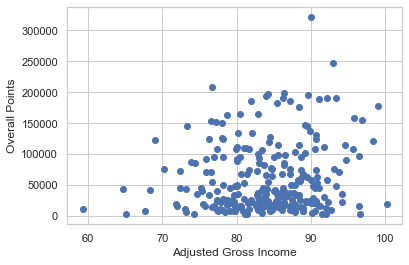

In [182]:
plt.scatter(data_correlation,overall_points)
plt.xlabel('Adjusted Gross Income')
plt.ylabel('Overall Points')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

In [183]:
#All schools with test scores under 76
under_seventy_six = test_score_table.loc[test_score_table["Overall Points"] < 76, [
    "Overall Points",'Adjust Gross Income',"City", "State", "ZIP", "District Name"]]
under_seventy_six

Overall Points          City State      ZIP  \
                                                 
0            59.3     CANNELTON    IN  47520.0   
1            64.7  INDIANAPOLIS    IN  46204.0   
2            65.1         MODOC    IN  47358.0   
3            67.7        MEDORA    IN  47260.0   
4            68.3        ELWOOD    IN  46036.0   
5            69.0  INDIANAPOLIS    IN  46219.0   
6            70.2        MARION    IN  46952.0   
7            71.8       HANOVER    IN  47243.0   
8            72.0      HAMILTON    IN  46742.0   
9            72.4      ANDERSON    IN  46011.0   
10           72.4   BEECH GROVE    IN  46107.0   
11           73.1          LYNN    IN  47355.0   
12           73.2    ALEXANDRIA    IN  46001.0   
13           73.2        HAMLET    IN  46532.0   
14           73.3        HOBART    IN  46342.0   
15           73.8  INDIANAPOLIS    IN  46221.0   
16           74.3      STRAUGHN    IN  47387.0   
17           74.4     FRANKFORT    IN  46041.0   
18           74.6      MITCHELL    IN  47446.0   
19           75.2      SYRACUSE    IN  46567.0   
20           75.4     LAFAYETTE    IN  47904.0   
21           75.5         VEVAY    IN  47043.0   
22           75.8    UNION CITY    IN  47390.0   
23           75.9  INDIANAPOLIS    IN  46241.0   
24           75.9       MADISON    IN  47250.0   

                      District Name Adjust Gross Income  
                                                 median  
0            CANNELTON CITY SCHOOLS             11725.0  
1       INDIANAPOLIS PUBLIC SCHOOLS             44107.5  
2          UNION SCHOOL CORPORATION              3943.0  
3      MEDORA COMMUNITY SCHOOL CORP              7362.0  
4      ELWOOD COMMUNITY SCHOOL CORP             41258.5  
5             M S D WARREN TOWNSHIP            122324.0  
6          MARION COMMUNITY SCHOOLS             76584.5  
7     SOUTHWESTERN-JEFFERSON CO CON             18797.5  
8        HAMILTON COMMUNITY SCHOOLS             15553.5  
9    ANDERSON COMMUNITY SCHOOL CORP             72958.5  
10         BEECH GROVE CITY SCHOOLS             44959.0  
11    RANDOLPH SOUTHERN SCHOOL CORP             11940.0  
12       ALEXANDRIA COM SCHOOL CORP             43256.0  
13         OREGON-DAVIS SCHOOL CORP              6885.0  
14  RIVER FOREST COMMUNITY SCH CORP            145027.5  
15           M S D DECATUR TOWNSHIP             87183.0  
16          SOUTH HENRY SCHOOL CORP              2935.0  
17   COMMUNITY SCHOOLS OF FRANKFORT             85809.5  
18       MITCHELL COMMUNITY SCHOOLS             36019.5  
19    WAWASEE COMMUNITY SCHOOL CORP             45599.5  
20     LAFAYETTE SCHOOL CORPORATION             39812.0  
21   SWITZERLAND COUNTY SCHOOL CORP             19762.0  
22     RANDOLPH EASTERN SCHOOL CORP             15651.0  
23             M S D WAYNE TOWNSHIP             71340.0  
24     MADISON CONSOLIDATED SCHOOLS             92128.5

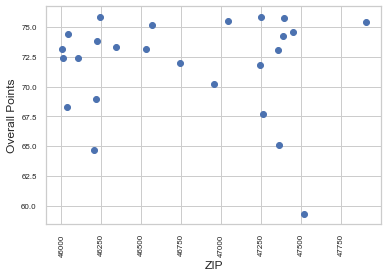

In [184]:
#Scatter plot of test scores under 76
plt.scatter(under_seventy_six.iloc[:,3],under_seventy_six.iloc[:,0])
plt.xlabel('ZIP')
plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=8)
plt.ylabel('Overall Points', rotation=90)
plt.show()

In [185]:
#All schools with test scores equal to and over 76 
over_seventy_six = test_score_table.loc[test_score_table["Overall Points"] >= 76, [
    "Overall Points",'Adjust Gross Income',"City", "State", "ZIP", "District Name"]]
over_seventy_six

Overall Points             City State      ZIP  \
                                                     
25            76.3           ALBION    IN  46701.0   
26            76.3           MUNCIE    IN  47304.0   
27            76.5    MICHIGAN CITY    IN  46360.0   
28            76.6           WABASH    IN  46992.0   
29            76.7      CLARKSVILLE    IN  47129.0   
30            76.7    CROTHERSVILLE    IN  47229.0   
31            76.7          ELKHART    IN  46514.0   
32            76.9           CULVER    IN  46511.0   
33            76.9        VINCENNES    IN  47591.0   
34            77.2         RICHMOND    IN  47374.0   
35            77.3         CONVERSE    IN  46919.0   
36            77.3       FORT WAYNE    IN  46802.0   
37            77.3             GARY    IN  46408.0   
38            77.4           AUSTIN    IN  47102.0   
39            77.4     INDIANAPOLIS    IN  46240.0   
40            77.5           CAYUGA    IN  47928.0   
41            77.7           GASTON    IN  47342.0   
42            77.9         GAS CITY    IN  46933.0   
43            78.0         KENTLAND    IN  47951.0   
44            78.0           KOKOMO    IN  46902.0   
45            78.0          SEYMOUR    IN  47274.0   
46            78.2       GREENSBURG    IN  47240.0   
47            78.2     INDIANAPOLIS    IN  46236.0   
48            78.2        PRINCETON    IN  47670.0   
49            78.2        WESTVILLE    IN  46391.0   
50            78.4        MONTEZUMA    IN  47862.0   
51            78.7       EVANSVILLE    IN  47713.0   
52            78.7           GOSHEN    IN  46526.0   
53            78.7            PAOLI    IN  47454.0   
54            79.1           AURORA    IN  47001.0   
55            79.1     FRANCESVILLE    IN  47946.0   
56            79.4           ATTICA    IN  47918.0   
57            79.4        PIERCETON    IN  46562.0   
58            79.7    CAMPBELLSBURG    IN  47108.0   
59            79.7           LINTON    IN  47441.0   
60            79.7       PETERSBURG    IN  47567.0   
61            79.8          MOROCCO    IN  47963.0   
62            79.8           SHOALS    IN  47581.0   
63            79.8          SPENCER    IN  47460.0   
64            79.9     INDIANAPOLIS    IN  46268.0   
65            80.0          BEDFORD    IN  47421.0   
66            80.0       NEW CASTLE    IN  47362.0   
67            80.1         LAGRANGE    IN  46761.0   
68            80.1             PERU    IN  46970.0   
69            80.1          WHITING    IN  46394.0   
70            80.2         FRANKLIN    IN  46131.0   
71            80.2    HARTFORD CITY    IN  47348.0   
72            80.4            ARGOS    IN  46501.0   
73            80.4       LOGANSPORT    IN  46947.0   
74            80.5     MERRILLVILLE    IN  46410.0   
75            80.6         BICKNELL    IN  47512.0   
76            80.6      FRENCH LICK    IN  47432.0   
77            80.6      GREENCASTLE    IN  46135.0   
78            80.9      BUNKER HILL    IN  46914.0   
79            81.0   CRAWFORDSVILLE    IN  47933.0   
80            81.0        EDINBURGH    IN  46124.0   
81            81.0       SCOTTSBURG    IN  47170.0   
82            81.1       SWITZ CITY    IN  47465.0   
83            81.2   CRAWFORDSVILLE    IN  47933.0   
84            81.4      GREENCASTLE    IN  46135.0   
85            81.4           PONETO    IN  46781.0   
86            81.5         FAIRLAND    IN  46126.0   
87            81.6     NORTH VERNON    IN  47265.0   
88            81.7    COLUMBIA CITY    IN  46725.0   
89            81.7            SELMA    IN  47383.0   
90            81.9        LAFAYETTE    IN  47909.0   
91            81.9        ROCKVILLE    IN  47872.0   
92            82.1     MARTINSVILLE    IN  46151.0   
93            82.1     NORTH JUDSON    IN  46366.0   
94            82.6       HAGERSTOWN    IN  47346.0   
95            82.7         ANDERSON    IN  46011.0   
96            82.7          FREMONT    IN  46737.0   
97      

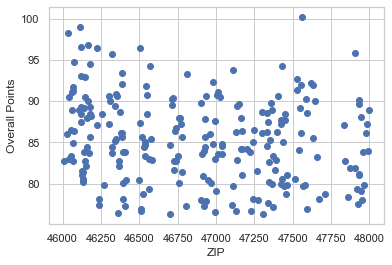

In [186]:
#Graph scores over 76
plt.scatter(over_seventy_six.iloc[:,3],over_seventy_six.iloc[:,0])
plt.xlabel('ZIP')
plt.ylabel('Overall Points')
plt.show()

In [187]:
#Average Scores for each Zip Code
zip_code_group = test_score_table.groupby('ZIP').mean()["Overall Points"]
zip_code_group = zip_code_group.reset_index()
zip_code_group

ZIP  Overall Points
0    46001.0       73.200000
1    46011.0       77.550000
2    46030.0       86.000000
3    46033.0       98.300000
4    46036.0       68.300000
5    46040.0       90.500000
6    46041.0       78.700000
7    46052.0       86.500000
8    46057.0       83.400000
9    46060.0       91.100000
10   46064.0       88.900000
11   46065.0       91.200000
12   46068.0       82.800000
13   46069.0       91.700000
14   46071.0       84.900000
15   46072.0       86.400000
16   46077.0       94.700000
17   46105.0       88.900000
18   46107.0       72.400000
19   46112.0       99.000000
20   46117.0       96.600000
21   46118.0       89.300000
22   46120.0       87.500000
23   46122.0       93.100000
24   46123.0       88.400000
25   46124.0       81.000000
26   46126.0       81.500000
27   46131.0       80.200000
28   46135.0       81.000000
29   46140.0       83.900000
30   46142.0       89.200000
31   46143.0       92.900000
32   46148.0       82.800000
33   46149.0       90.500000
34   46151.0       82.100000
35   46157.0       84.400000
36   46158.0       87.900000
37   46163.0       90.000000
38   46168.0       96.800000
39   46173.0       83.700000
40   46176.0       89.500000
41   46181.0       89.300000
42   46184.0       88.200000
43   46204.0       64.700000
44   46219.0       69.000000
45   46221.0       73.800000
46   46224.0       96.400000
47   46227.0       87.100000
48   46236.0       78.200000
49   46240.0       77.400000
50   46241.0       75.900000
51   46259.0       88.500000
52   46268.0       79.900000
53   46303.0       87.200000
54   46304.0       90.600000
55   46307.0       90.000000
56   46319.0       83.700000
57   46321.0       95.700000
58   46322.0       84.400000
59   46341.0       85.200000
60   46342.0       81.350000
61   46347.0       90.900000
62   46350.0       85.400000
63   46356.0       90.600000
64   46360.0       76.500000
65   46366.0       82.100000
66   46368.0       82.800000
67   46373.0       88.700000
68   46382.0       86.100000
69   46385.0       90.566667
70   46390.0       85.600000
71   46391.0       78.200000
72   46392.0       83.800000
73   46394.0       80.100000
74   46405.0       83.800000
75   46408.0       77.300000
76   46410.0       80.500000
77   46501.0       80.400000
78   46504.0       96.400000
79   46506.0       87.300000
80   46511.0       76.900000
81   46514.0       76.700000
82   46517.0       85.600000
83   46526.0       78.700000
84   46528.0       84.500000
85   46532.0       73.200000
86   46534.0       85.000000
87   46536.0       83.300000
88   46540.0       84.700000
89   46545.0       91.800000
90   46550.0       90.800000
91   46552.0       88.500000
92   46562.0       79.400000
93   46563.0       83.000000
94   46567.0       75.200000
95   46571.0       94.200000
96   46574.0       85.400000
97   46580.0       82.900000
98   46701.0       76.300000
99   46703.0       84.700000
100  46711.0       90.300000
101  46714.0       89.500000
102  46721.0       90.400000
103  46723.0       82.800000
104  46725.0       81.700000
105  46733.0       86.400000
106  46737.0       82.700000
107  46738.0       86.800000
108  46742.0       72.000000
109  46750.0       83.400000
110  46761.0       84.000000
111  46767.0       88.000000
112  46772.0       87.200000
113  46777.0       85.600000
114  46781.0       81.400000
115  46802.0       77.300000
116  46814.0       93.300000
117  46901.0       89.800000
118  46902.0       78.000000
119  46910.0       83.600000
120  46914.0       80.900000
121  46919.0       77.300000
122  46923.0       84.000000
123  46926.0       84.500000
124  46928.0       87.800000
125  46929.0       85.600000
126  46933.0       77.900000
127  46936.0       90.600000
128  46947.0       80.400000
129  46952.0       70.200000
130  46962.0       86.000000
131  46970.0       80.100000
132  46978.0       84.800000
133  46979.0       92.300000
134  46992.0       76.600000
135  46994.0       87.600000
136  46996.0       83.000000
137  47

In [188]:
#Lowest and Highest Overall Score
lowest_score = test_score_table["Overall Points"].min()
lowest_score
highest_score = test_score_table["Overall Points"].max()
highest_score

summary_table = pd.DataFrame({"Highest Test Score": [highest_score],
                              "Lowest Test Score": [lowest_score]})
summary_table

Highest Test Score  Lowest Test Score
0               100.2               59.3

# Comparison to Other States: <font color='crimson'> Indiana </font> vs. <font color='orange'> Tennessee </font>
***
## Comparison on <font color= 'olivedrab'> Median Income </font> by State and<font color='mediumslateblue'> SAT Test Score</font>.
####  Sources of Data : 
#### &#8226; [Federal Reserve Economic Data, Indiana, 2017](https://fred.stlouisfed.org/graph/?id=MEHOINUSINA672N,)
    
#### &#8226; [Federal Reserve Economic Data, Tennessee, 2017](https://fred.stlouisfed.org/graph/?id=MEHOINUSTNA646N,)
#### &#8226; [SAT Annual Report, Indiana, 2017](https://reports.collegeboard.org/pdf/2017-indiana-sat-suite-assessments-annual-report.pdf)
#### &#8226; [SAT Annual Report, Tennessee, 2017](https://reports.collegeboard.org/pdf/2017-tennessee-sat-suite-assessments-annual-report.pdf,)

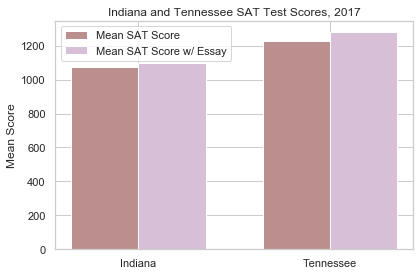

In [189]:
#Indiana vs Tennessee SAT bar chart.
import matplotlib.pyplot as plt
import numpy as np

#Data from College Board, Median SAT scores.
means_sat=[1074,1228]
means_sat_essay=[1098,1283]

#Setting other chart needs.
x = np.arange(1,3)
labels_2=('Indiana','Tennessee')
width=.35
fig, ax = plt.subplots()
rects_sat = ax.bar(x-width/2, means_sat, width, label='Mean SAT Score', color='rosybrown', align='center')
rects_sat_essay = ax.bar(x+width/2, means_sat_essay, width, label='Mean SAT Score w/ Essay', color='thistle', align='center')

#setting labels and tick marks.
ax.set_ylabel('Mean Score')
ax.set_title('Indiana and Tennessee SAT Test Scores, 2017')
ax.set_xticks(x)
ax.set_xticklabels(labels_2)
ax.legend()                         
                           
#Plotting
plt.tight_layout()
plt.show()

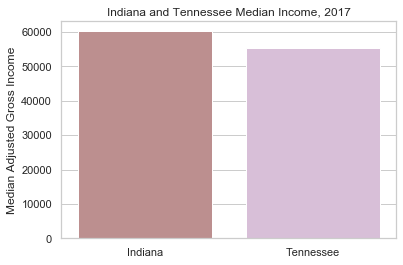

In [190]:
import seaborn as sns
sns.set(style="whitegrid")
x_vals=["Indiana","Tennessee"]
y_vals=[60200,55306]
colors='rosybrown','thistle'
ax = sns.barplot(x=x_vals, y=y_vals, palette = colors,capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd' )
ax.axes.yaxis.label.set_text("Median Adjusted Gross Income")
ax.title.set_text('Indiana and Tennessee Median Income, 2017')

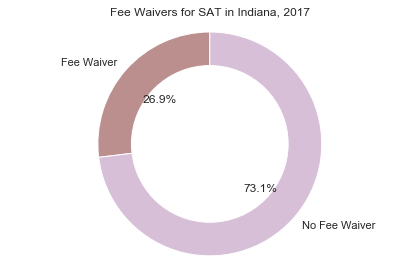

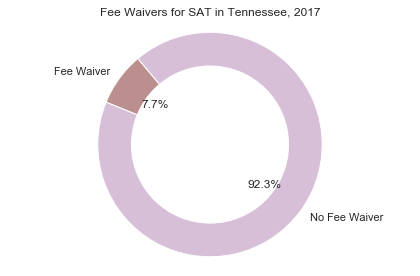

In [191]:
#Fee Waivers for SAT Test in Indiana Piecharts
import matplotlib.pyplot as plt
#Pie chart
labels = ['Fee Waiver', 'No Fee Waiver']
sizes = [12279,33343]
#colors
colors = ['rosybrown','thistle']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 

#Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
ax1.title.set_text('Fee Waivers for SAT in Indiana, 2017')
plt.tight_layout()

#Second Pie Chart
labels = ['Fee Waiver', 'No Fee Waiver']
sizes_2 = [270,3225]
#colors
colors = ['rosybrown','thistle']
fig2, ax2 = plt.subplots()
ax2.pie(sizes_2, colors = colors, labels=labels, autopct='%1.1f%%', startangle=130)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 

#Equal aspect ratio ensures that pie is drawn as a circle
ax2.axis('equal')  
ax2.title.set_text('Fee Waivers for SAT in Tennessee, 2017')
plt.tight_layout()
plt.show()

In [195]:
def set_pandas_display_options() -> None:
    # Ref: https://stackoverflow.com/a/52432757/
    display = pd.options.display

    display.max_columns = 2000
    display.max_rows = 2000
    display.max_colwidth = 199
    display.width = None
    # display.precision = 2  # set as needed

set_pandas_display_options()

In [197]:
sample_money.dtypes

ZIP                              float64
Size of adjusted gross income     object
number of returns                 object
single returns                    object
joint returns                     object
Adjusted gross income            float64
dtype: object

In [198]:
sample_money['Adjusted gross income'] = pd.to_numeric(sample_money['Adjusted gross income'], errors='coerce')

In [199]:
sample_money['single returns'] = pd.to_numeric(sample_money['single returns'], errors='coerce')

In [200]:
sample_money['joint returns'] = pd.to_numeric(sample_money['joint returns'], errors='coerce')

In [201]:
sample_money['number of returns'] = pd.to_numeric(sample_money['number of returns'], errors='coerce')

In [202]:
sample_money['ZIP'] = pd.to_numeric(sample_money['ZIP'], errors='coerce')

In [203]:
school_complete = pd.merge(school_data, test_score_data, how="left", on=["ID", "ID"])

In [204]:
school_complete

ID                       District Name  \
0    9545.0    21ST CENTURY CHARTER SCH OF GARY   
1      15.0     ADAMS CENTRAL COMMUNITY SCHOOLS   
2    5265.0          ALEXANDRIA COM SCHOOL CORP   
3    5275.0      ANDERSON COMMUNITY SCHOOL CORP   
4    9790.0        ANDERSON PREPARATORY ACADEMY   
5    9715.0                      ANDREW ACADEMY   
6    9615.0              ANDREW J BROWN ACADEMY   
7    6700.0     AREA 30 CAREER CENTER EDU INTER   
8    5470.0             ARGOS COMMUNITY SCHOOLS   
9    9685.0              ASPIRE CHARTER ACADEMY   
10   2435.0        ATTICA CONSOLIDATED SCH CORP   
11   3315.0          AVON COMMUNITY SCHOOL CORP   
12   1315.0          BARR-REEVE COM SCHOOLS INC   
13    365.0         BARTHOLOMEW CON SCHOOL CORP   
14   6895.0       BATESVILLE COMMUNITY SCH CORP   
15   2260.0             BAUGO COMMUNITY SCHOOLS   
16   9830.0                      BEACON ACADEMY   
17   5380.0            BEECH GROVE CITY SCHOOLS   
18    395.0        BENTON COMMUNITY SCHOOL CORP   
19    515.0            BLACKFORD COUNTY SCHOOLS   
20   2920.0          BLOOMFIELD SCHOOL DISTRICT   
21   7375.0          BLUE RIVER CAREER PROGRAMS   
22   3405.0           BLUE RIVER VALLEY SCHOOLS   
23   5480.0               BREMEN PUBLIC SCHOOLS   
24    670.0     BROWN COUNTY SCHOOL CORPORATION   
25   3305.0       BROWNSBURG COMMUNITY SCH CORP   
26   3695.0         BROWNSTOWN CNT COM SCH CORP   
27   9620.0            BURRIS LABORATORY SCHOOL   
28   3455.0      C A BEARD MEMORIAL SCHOOL CORP   
29   9725.0            CANAAN COMMUNITY ACADEMY   
30   6340.0              CANNELTON CITY SCHOOLS   
31   9880.0        CAREER ACADEMY AT SOUTH BEND   
32   3060.0                 CARMEL CLAY SCHOOLS   
33   9755.0        CARPE DIEM - MERIDIAN CAMPUS   
34    750.0       CARROLL CONSOLIDATED SCH CORP   
35   2650.0           CASTON SCHOOL CORPORATION   
36   4205.0           CENTER GROVE COM SCH CORP   
37   8360.0       CENTERVILLE-ABINGTON COM SCHS   
38   9580.0    CENTRAL IN EDUCATION SERVICE CTR   
39   4265.0          CENTRAL NINE CAREER CENTER   
40   6055.0       CENTRAL NOBLE COM SCHOOL CORP   
41   9645.0        CHALLENGE FOUNDATION ACADEMY   
42   9445.0  CHARLES A TINDLEY ACCELERATED SCHL   
43   9310.0         CHARTER SCHOOL OF THE DUNES   
44   9380.0              CHRISTEL HOUSE ACADEMY   
45   9385.0  CHRISTEL HOUSE DORS (DROPOUT RCVY)   
46   4145.0      CLARK-PLEASANT COM SCHOOL CORP   
47   1000.0         CLARKSVILLE COM SCHOOL CORP   
48   1125.0              CLAY COMMUNITY SCHOOLS   
49   1150.0         CLINTON CENTRAL SCHOOL CORP   
50   1160.0         CLINTON PRAIRIE SCHOOL CORP   
51   6750.0        CLOVERDALE COMMUNITY SCHOOLS   
52   9320.0            COMMUNITY MONTESSORI INC   
53   1170.0      COMMUNITY SCHOOLS OF FRANKFORT   
54   2270.0           CONCORD COMMUNITY SCHOOLS   
55   8035.0         COVERED BRIDGE SPEC ED DIST   
56   2440.0        COVINGTON COMMUNITY SCH CORP   
57   1900.0         COWAN COMMUNITY SCHOOL CORP   
58   1300.0         CRAWFORD CO COM SCHOOL CORP   
59   5855.0          CRAWFORDSVILLE COM SCHOOLS   
60   3710.0     CROTHERSVILLE COMMUNITY SCHOOLS   
61   4660.0      CROWN POINT COMMUNITY SCH CORP   
62   8825.0                        CSUSA DONNAN   
63   8810.0                          CSUSA HOWE   
64   8815.0                        CSUSA MANUAL   
65   5455.0       CULVER COMMUNITY SCHOOLS CORP   
66   1940.0         DALEVILLE COMMUNITY SCHOOLS   
67   9920.0               DAMAR CHARTER ACADEMY   
68   3325.0      DANVILLE COMMUNITY SCHOOL CORP   
69   1440.0      DAVIESS-MARTIN SPECIAL ED COOP   
70   1655.0          DECATUR COUNTY COM SCHOOLS   
71   1835.0       DEKALB CO CTL UNITED SCH DIST   
72   1805.0      DEKALB CO EASTERN COM SCH DIST   
73   1875.0      DELAWARE COMMUNITY SCHOOL CORP   
74    755.0        DELPHI COMMUNITY SCHOOL CORP   
75   9870.0            DISCOVERY CHARTER SCHOOL   
76   9795.0        DR ROBERT H FAULKNER ACADEMY   
77   6470.0         DUNELAND SC

In [205]:
zip_sample = pd.pivot_table(sample_money, values=[ 'Adjusted gross income'],  index=['ZIP'],
                      aggfunc={ 'Adjusted gross income': np.median})
                                
                               
zip_sample  

Adjusted gross income
ZIP                           
0.0                 27616132.5
46001.0                43256.0
46011.0                72958.5
46012.0                72021.5
46013.0                62791.5
46016.0                30988.0
46017.0                25946.0
46030.0                13281.5
46031.0                 9516.0
46032.0               172623.0
46033.0               120463.0
46034.0                32889.0
46035.0                 5665.0
46036.0                41258.5
46037.0               163008.5
46038.0               213594.0
46039.0                 3257.0
46040.0                44917.5
46041.0                85809.5
46044.0                12807.5
46048.0                 7079.0
46049.0                 3719.0
46050.0                 7695.0
46051.0                12982.0
46052.0                99228.0
46055.0                63161.5
46056.0                10307.0
46057.0                 5433.0
46058.0                 9000.0
46060.0               188955.5
46062.0               153109.5
46064.0                68295.5
46065.0                15421.0
46068.0                11266.5
46069.0                30896.5
46070.0                 9377.0
46071.0                16234.5
46072.0                40033.5
46074.0               134647.0
46075.0                38102.0
46076.0                 6677.0
46077.0                90816.5
46104.0                 4025.0
46105.0                 8487.0
46106.0                31987.0
46107.0                44959.0
46110.0                 2425.0
46112.0               178028.5
46113.0                71933.5
46115.0                 9026.0
46117.0                 3318.0
46118.0                22500.0
46120.0                25263.0
46121.0                25595.5
46122.0                75538.5
46123.0               175664.5
46124.0                28179.0
46126.0                21468.0
46127.0                 1545.0
46128.0                10145.0
46130.0                11603.0
46131.0               133353.5
46133.0                 3641.0
46135.0                67597.5
46140.0               194444.5
46142.0               146974.5
46143.0               247225.0
46147.0                11738.0
46148.0                20083.5
46149.0                 8588.0
46150.0                 3597.0
46151.0               134703.5
46156.0                 5788.0
46157.0                17462.5
46158.0               104139.5
46160.0                25393.0
46161.0                11888.0
46162.0                 2131.0
46163.0                57602.5
46164.0                19945.5
46165.0                 6041.0
46166.0                 9600.0
46167.0                32819.5
46168.0               154985.0
46171.0                 8590.0
46172.0                10007.0
46173.0                41131.0
46175.0                 2568.0
46176.0               114692.0
46180.0                 4532.0
46181.0                24106.5
46182.0                 9337.0
46184.0                58631.5
46186.0                 9210.5
46201.0                63493.0
46202.0                83964.0
46203.0               102348.5
46204.0                44107.5
46205.0               123046.5
46208.0                69559.5
46214.0                86764.0
46216.0                11626.0
46217.0               159444.5
46218.0                51072.0
46219.0               122324.0
46220.0               186152.0
46221.0                87183.0
46222.0                69343.0
46224.0                97266.0
46225.0                18731.0
46226.0               124631.5
46227.0               185908.0
46228.0                70031.5
46229.0                93735.0
46231.0                46367.5
46234.0               128452.5
46235.0                80150.0
46236.0               124886.5
46237.0               200949.5
46239.0               142302.5
46240.0               107969.0
46241.0                71340.0
46250.0               112089.5
46254.0               116678.0
46256.0               101888.0
46259.0                56135.0
46260.0               143973.0
46268.0   

In [206]:
school_complete = pd.merge(sample_money, school_complete, how="left", on=["ZIP", "ZIP"])




In [207]:
school_complete['Overall Points'] = pd.to_numeric(school_complete['Overall Points'], errors='coerce')

In [208]:
school_complete.dropna()

ZIP Size of adjusted gross income  number of returns  \
11    46001.0              $1 under $25,000             1910.0   
12    46001.0         $25,000 under $50,000             1280.0   
13    46001.0         $50,000 under $75,000              760.0   
14    46001.0        $75,000 under $100,000              460.0   
15    46001.0       $100,000 under $200,000              460.0   
21    46011.0              $1 under $25,000             2960.0   
23    46011.0              $1 under $25,000             2960.0   
24    46011.0         $25,000 under $50,000             2070.0   
26    46011.0         $25,000 under $50,000             2070.0   
27    46011.0         $50,000 under $75,000             1220.0   
29    46011.0         $50,000 under $75,000             1220.0   
30    46011.0        $75,000 under $100,000              820.0   
32    46011.0        $75,000 under $100,000              820.0   
33    46011.0       $100,000 under $200,000             1020.0   
35    46011.0       $100,000 under $200,000             1020.0   
73    46030.0              $1 under $25,000              470.0   
74    46030.0         $25,000 under $50,000              330.0   
75    46030.0         $50,000 under $75,000              230.0   
76    46030.0        $75,000 under $100,000              140.0   
97    46033.0              $1 under $25,000             4360.0   
98    46033.0         $25,000 under $50,000             1900.0   
99    46033.0         $50,000 under $75,000             1630.0   
100   46033.0        $75,000 under $100,000             1590.0   
101   46033.0       $100,000 under $200,000             4840.0   
102   46033.0              $200,000 or more             3560.0   
121   46036.0              $1 under $25,000             2130.0   
122   46036.0         $25,000 under $50,000             1440.0   
123   46036.0         $50,000 under $75,000              760.0   
124   46036.0        $75,000 under $100,000              420.0   
125   46036.0       $100,000 under $200,000              380.0   
153   46040.0              $1 under $25,000             1710.0   
154   46040.0         $25,000 under $50,000             1070.0   
155   46040.0         $50,000 under $75,000              730.0   
156   46040.0        $75,000 under $100,000              520.0   
157   46040.0       $100,000 under $200,000             1270.0   
158   46040.0              $200,000 or more              910.0   
162   46041.0              $1 under $25,000             4170.0   
163   46041.0              $1 under $25,000             4170.0   
164   46041.0         $25,000 under $50,000             3230.0   
165   46041.0         $25,000 under $50,000             3230.0   
166   46041.0         $50,000 under $75,000             1560.0   
167   46041.0         $50,000 under $75,000             1560.0   
168   46041.0        $75,000 under $100,000              880.0   
169   46041.0        $75,000 under $100,000              880.0   
170   46041.0       $100,000 under $200,000              860.0   
171   46041.0       $100,000 under $200,000              860.0   
216   46052.0              $1 under $25,000             3760.0   
217   46052.0         $25,000 under $50,000             2880.0   
218   46052.0         $50,000 under $75,000             1600.0   
219   46052.0        $75,000 under $100,000             1120.0   
220   46052.0       $100,000 under $200,000             1340.0   
240   46057.0              $1 under $25,000              180.0   
241   46057.0         $25,000 under $50,000              130.0   
242   46057.0         $50,000 under $75,000               90.0   
257   46060.0              $1 under $25,000             6020.0   
259   46060.0         $25,000 under $50,000             4510.0   
261   46060.0         $50,000 under $75,000             2990.0   
263   46060.0        $75,000 under $100,000             2220.0   
265   46060.0       $100,000 under $200,000             3360.0   
267   46060.0              $200,000 or more       

In [209]:
school_comparison = pd.pivot_table(school_complete, values=[ 'Adjusted gross income'],
                                                         index=['City', 'Overall Points', 'Overall Grade', 'District Name', 'ID'],
                      aggfunc={ 'Adjusted gross income': [np.median, np.sum]})
                               
                                
school_comparison

Adjusted gross income  \
                                                                                                      median   
City            Overall Points Overall Grade District Name                      ID                             
AKRON           83.6           B             TIPPECANOE VALLEY SCHOOL CORP      4445.0               15218.0   
ALBION          76.3           C             CENTRAL NOBLE COM SCHOOL CORP      6055.0               34355.5   
ALEXANDRIA      73.2           C             ALEXANDRIA COM SCHOOL CORP         5265.0               43256.0   
ANDERSON        72.4           C             ANDERSON COMMUNITY SCHOOL CORP     5275.0               72958.5   
                82.7           B             FRANKTON-LAPEL COMMUNITY SCHS      5245.0               72958.5   
ANGOLA          84.7           B             M S D STEUBEN COUNTY               7615.0               75642.0   
ARCADIA         86.0           B             HAMILTON HEIGHTS SCHOOL CORP       3025.0               13281.5   
ARGOS           80.4           B             ARGOS COMMUNITY SCHOOLS            5470.0               16112.0   
ATTICA          79.4           C             ATTICA CONSOLIDATED SCH CORP       2435.0               25679.0   
AURORA          79.1           C             SOUTH DEARBORN COM SCHOOL CORP     1600.0               44711.5   
AUSTIN          77.4           C             SCOTT COUNTY SCHOOL DISTRICT 1     7230.0               24722.0   
AVON            88.4           B             AVON COMMUNITY SCHOOL CORP         3315.0              175664.5   
BAINBRIDGE      88.9           B             NORTH PUTNAM COMMUNITY SCHOOLS     6715.0                8487.0   
BATESVILLE      90.8           A             BATESVILLE COMMUNITY SCH CORP      6895.0               53816.5   
BEDFORD         80.0           B             NORTH LAWRENCE COM SCHOOLS         5075.0              111716.5   
BEECH GROVE     72.4           C             BEECH GROVE CITY SCHOOLS           5380.0               44959.0   
BERNE           90.3           A             SOUTH ADAMS SCHOOLS                35.0                 29869.5   
BICKNELL        80.6           B             NORTH KNOX SCHOOL CORP             4315.0               13560.0   
BLOOMFIELD      87.2           B             BLOOMFIELD SCHOOL DISTRICT         2920.0               37922.0   
                87.7           B             EASTERN GREENE SCHOOLS             2940.0               37922.0   
BLOOMINGTON     90.6           A             MONROE COUNTY COM SCH CORP         5740.0              131027.0   
BLUFFTON        89.5           B             M S D BLUFFTON-HARRISON            8445.0               63744.0   
BOURBON         96.4           A             TRITON SCHOOL CORPORATION          5495.0               16352.5   
BRAZIL          87.1           B             CLAY COMMUNITY SCHOOLS             1125.0               76513.5   
BREMEN          87.3           B             BREMEN PUBLIC SCHOOLS              5480.0               50282.5   
BROOKVILLE      83.6           B             FRANKLIN COUNTY COM SCH CORP       2475.0               45284.0   
BROWNSBURG      99.0           A             BROWNSBURG COMMUNITY SCH CORP      3305.0              178028.5   
BROWNSTOWN      83.8           B             BROWNSTOWN CNT COM SCH CORP        3695.0               22442.0   
BUNKER HILL     80.9           B             MACONAQUAH SCHOOL CORP             5615.0                7663.0   
BUTLER          90.4           A             DEKALB CO EASTERN COM SCH DIST     1805.0               21663.0   
CAMPBELLSBURG   79.7           C             WEST WASHINGTON SCHOOL CORP        8220.0                7923.0   
CANNELTON       59.3           F             CANNELTON CITY SCHOOLS             6340.0               11725.0   
CARMEL          98.3           A             CARMEL CLAY SCHOOLS                3060.0              120463.0   
CAYUGA          77.5           C             NORTH VERM

In [274]:
indy_school = school_comparison.loc['INDIANAPOLIS']

In [275]:
indy_school

Adjusted gross income  \
                                                                                  median   
Overall Points Overall Grade District Name                  ID                             
64.7           D             INDIANAPOLIS PUBLIC SCHOOLS    5385.0               44107.5   
69.0           D             M S D WARREN TOWNSHIP          5360.0              122324.0   
73.8           C             M S D DECATUR TOWNSHIP         5300.0               87183.0   
75.9           C             M S D WAYNE TOWNSHIP           5375.0               71340.0   
77.4           C             M S D WASHINGTON TOWNSHIP      5370.0              107969.0   
78.2           C             M S D LAWRENCE TOWNSHIP        5330.0              124886.5   
79.9           C             M S D PIKE TOWNSHIP            5350.0              108731.0   
87.1           B             M S D PERRY TOWNSHIP           5340.0              185908.0   
88.5           B             FRANKLIN TOWNSHIP COM SCH CORP 5310.0               56135.0   

                                                                               
                                                                          sum  
Overall Points Overall Grade District Name                  ID                 
64.7           D             INDIANAPOLIS PUBLIC SCHOOLS    5385.0   551529.0  
69.0           D             M S D WARREN TOWNSHIP          5360.0   725124.0  
73.8           C             M S D DECATUR TOWNSHIP         5300.0   505729.0  
75.9           C             M S D WAYNE TOWNSHIP           5375.0   461837.0  
77.4           C             M S D WASHINGTON TOWNSHIP      5370.0  1211480.0  
78.2           C             M S D LAWRENCE TOWNSHIP        5330.0  1292060.0  
79.9           C             M S D PIKE TOWNSHIP            5350.0   638936.0  
87.1           B             M S D PERRY TOWNSHIP           5340.0  1119609.0  
88.5           B             FRANKLIN TOWNSHIP COM SCH CORP 5310.0   550937.0

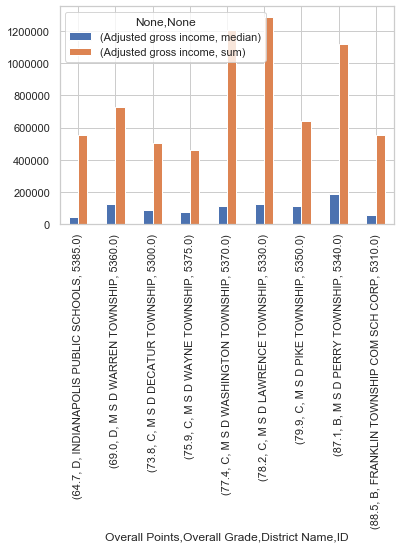

In [276]:
indy_school.plot.bar()

In [277]:
indy_school.reset_index()

Overall Points Overall Grade                   District Name      ID  \
                                                                         
0           64.7             D     INDIANAPOLIS PUBLIC SCHOOLS  5385.0   
1           69.0             D           M S D WARREN TOWNSHIP  5360.0   
2           73.8             C          M S D DECATUR TOWNSHIP  5300.0   
3           75.9             C            M S D WAYNE TOWNSHIP  5375.0   
4           77.4             C       M S D WASHINGTON TOWNSHIP  5370.0   
5           78.2             C         M S D LAWRENCE TOWNSHIP  5330.0   
6           79.9             C             M S D PIKE TOWNSHIP  5350.0   
7           87.1             B            M S D PERRY TOWNSHIP  5340.0   
8           88.5             B  FRANKLIN TOWNSHIP COM SCH CORP  5310.0   

  Adjusted gross income             
                 median        sum  
0               44107.5   551529.0  
1              122324.0   725124.0  
2               87183.0   505729.0  
3               71340.0   461837.0  
4              107969.0  1211480.0  
5              124886.5  1292060.0  
6              108731.0   638936.0  
7              185908.0  1119609.0  
8               56135.0   550937.0

In [278]:
correlation = st.pearsonr(indy_school.reset_index().iloc[:,0],indy_school.reset_index().iloc[:,5])
print(f"The correlation between both factors is {round(correlation[0],2)}")
correlation

The correlation between both factors is 0.28


(0.2792953571531565, 0.4667242306077818)

In [279]:
correlation

(0.2792953571531565, 0.4667242306077818)

In [283]:
indy_school = school_comparison.loc['MUNCIE']

In [284]:
indy_school

Adjusted gross income  \
                                                                                  median   
Overall Points Overall Grade District Name                  ID                             
76.3           C             MUNCIE COMMUNITY SCHOOLS       1970.0              124174.5   
86.1           B             COWAN COMMUNITY SCHOOL CORP    1900.0               68398.5   
88.7           B             DELAWARE COMMUNITY SCHOOL CORP 1875.0               60631.5   

                                                                              
                                                                         sum  
Overall Points Overall Grade District Name                  ID                
76.3           C             MUNCIE COMMUNITY SCHOOLS       1970.0  847024.0  
86.1           B             COWAN COMMUNITY SCHOOL CORP    1900.0  388849.0  
88.7           B             DELAWARE COMMUNITY SCHOOL CORP 1875.0  361195.0

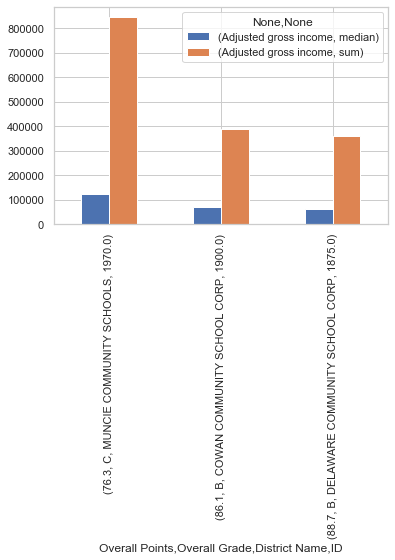

In [282]:
indy_school.plot.bar()

In [285]:
correlation = st.pearsonr(indy_school.reset_index().iloc[:,0],indy_school.reset_index().iloc[:,5])
print(f"The correlation between both factors is {round(correlation[0],2)}")
correlation

The correlation between both factors is -0.99


(-0.9888544197809871, 0.09513726464543673)

In [290]:
indy_school = school_comparison.loc['FORT WAYNE']
indy_school

Adjusted gross income  \
                                                                                     median   
Overall Points Overall Grade District Name                      ID                            
77.3           C             FORT WAYNE COMMUNITY SCHOOLS       235.0               26480.0   
93.3           A             M S D SOUTHWEST ALLEN COUNTY SCHLS 125.0               48999.0   

                                                                                  
                                                                             sum  
Overall Points Overall Grade District Name                      ID                
77.3           C             FORT WAYNE COMMUNITY SCHOOLS       235.0   171592.0  
93.3           A             M S D SOUTHWEST ALLEN COUNTY SCHLS 125.0  1232139.0

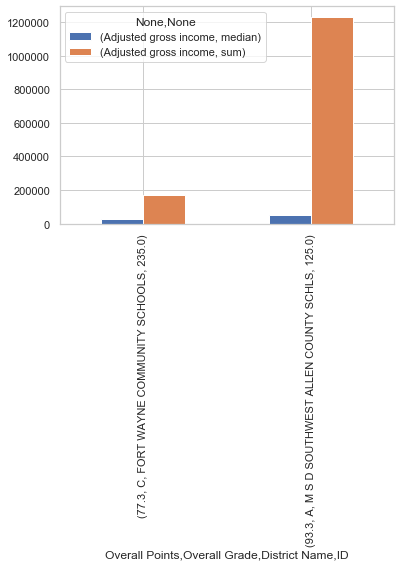

In [291]:
indy_school.plot.bar()

In [292]:
correlation = st.pearsonr(indy_school.reset_index().iloc[:,0],indy_school.reset_index().iloc[:,5])
print(f"The correlation between both factors is {round(correlation[0],2)}")
correlation

The correlation between both factors is 1.0


(1.0, 1.0)